In [9]:
import pandas as pd
import pickle
import numpy as np

In [4]:
data = {
        '00001' : { 'voteCount':0, 'votePoint':0, 'answerCount':0, 'total_work_time':0,
          'final_score' : {'passion' : 0, 'cooperation':0, 'diligence':0, 'responsibility':0, 'conductivity':0, 'leadership':0},
          'text_answser' : {'passion' : [], 'cooperation': [], 'diligence': [], 'responsibility':[], 'conductivity':[], 'leadership':[]}
          },

        '00002' : { 'voteCount':0, 'votePoint':0, 'answerCount':0, 'total_work_time':0,
          'final_score' : {'passion' : 0, 'cooperation':0, 'diligence':0, 'responsibility':0, 'conductivity':0, 'leadership':0},
          'text_answser' : {'passion' : [], 'cooperation': [], 'diligence': [], 'responsibility':[], 'conductivity':[], 'leadership':[]}
          },
        
        '00003' : { 'voteCount':0, 'votePoint':0, 'answerCount':0, 'total_work_time':0,
          'final_score' : {'passion' : 0, 'cooperation':0, 'diligence':0, 'responsibility':0, 'conductivity':0, 'leadership':0},
          'text_answser' : {'passion' : [], 'cooperation': [], 'diligence': [], 'responsibility':[], 'conductivity':[], 'leadership':[]}
          },

        '00004' : { 'voteCount':0, 'votePoint':0, 'answerCount':0, 'total_work_time':0,
          'final_score' : {'passion' : 0, 'cooperation':0, 'diligence':0, 'responsibility':0, 'conductivity':0, 'leadership':0},
          'text_answser' : {'passion' : [], 'cooperation': [], 'diligence': [], 'responsibility':[], 'conductivity':[], 'leadership':[]}
          },
          
          }

In [10]:
# load data
with open('work_class.pickle', 'rb') as fr:
    work_class = pickle.load(fr)
    
# show data
print(work_class)


{'서빙': 'B', '주방장·조리사': 'A', '주방보조·설거지': 'A', '바리스타': 'D', '제과제빵사': 'C', '일반음식점': 'B', '레스토랑': 'B', '패밀리레스토랑': 'B', '패스트푸드점': 'B', '치킨·피자전문점': 'B', '커피전문점': 'C', '아이스크림·디저트': 'C', '베이커리·도넛·떡': 'C', '호프·일반주점': 'B', '바(bar)': 'B', '급식·푸드시스템': 'A', '도시락·반찬': 'B', '매장관리·판매': 'C', '캐셔·카운터': 'C', '판촉도우미': 'B', 'MD·쇼핑몰운영': 'C', '백화점·쇼핑몰': 'D', '유통점·마트': 'C', '도소매·전통시장': 'D', '편의점': 'C', '의류·잡화·쥬얼리매장': 'D', '뷰티·헬스스토어': 'D', '휴대폰·전자기기매장': 'D', '가구·침구·인테리어': 'D', '생활용품샵': 'C', '서점·문구·팬시': 'C', '약국': 'D', '농수산·청과·축산': 'D', '화훼·꽃집': 'D', '스터디룸·독서실·고시원': 'D', 'PC방': 'B', '노래방': 'D', '볼링·당구장': 'D', '스크린골프·야구': 'D', 'DVD·멀티방·만화카페': 'C', '오락실·게임장': 'D', '이색테마카페': 'C', '키즈카페': 'A', '찜질방·사우나·스파': 'D', '피트니스·스포츠': 'D', '고속도로휴게소': 'B', '매장관리·판매기타': 'C', '놀이공원·테마파크': 'B', '호텔·리조트·숙박': 'C', '여행·캠프·레포츠': 'C', '영화관·공연장': 'B', '전시·컨벤션·세미나': 'D', '안내데스크·리셉션': 'D', '주차유도·안내': 'C', '보안·경비·경호': 'C', '주유·세차': 'C', '렌터카·차량관리': 'D', '전단지배포': 'D', '청소·미화': 'B', '렌탈관리·A/S': 'D', '골프캐디': 'D', '헤어·미용·네일샵': 'B', '피부관리·마사지'

In [21]:
from collections import Counter
Counter(work_class.values())

Counter({'C': 63, 'B': 48, 'D': 41, 'A': 15})

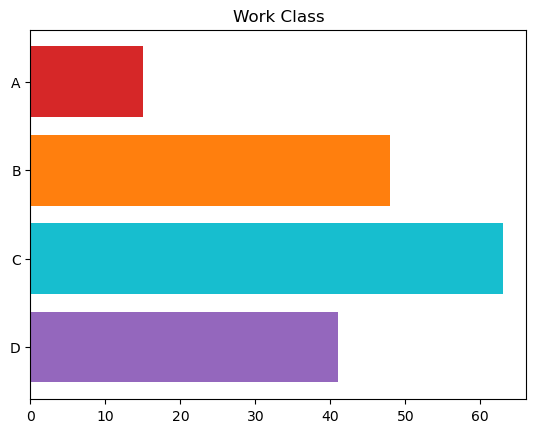

In [38]:
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(4)

years = ['D', 'C', 'B', 'A']
values = [41, 63, 48,15]

plt.barh(y, values, color=['C4', 'C9','C1', 'C3' ])
plt.yticks(y, years)
plt.title('Work Class')
plt.show()

In [25]:
input_data = {'userID':'00001', 'voteID':'00002','work_time(h)':1000, 'work_name': '주방장·조리사',
              'scored':[1,5,5,2,1,5,4,2,1,4,4,5,3,2,1,1,1,1], 'text':'우리 알바생은 요... 성실해요!'}

# work_class & work_time weight
work_score = {'A' : 1, 'B' : 0.97, 'C' : 0.94, 'D' : 0.91}
weight = work_score[work_class[input_data['work_name']]]*input_data['work_time(h)']

# score_update
data['00001']['final_score']['passion'] += sum(input_data['scored'][0:3])*weight
data['00001']['final_score']['cooperation'] += sum(input_data['scored'][3:6])*weight
data['00001']['final_score']['diligence'] += sum(input_data['scored'][6:9])*weight
data['00001']['final_score']['responsibility'] += sum(input_data['scored'][9:12])*weigh
data['00001']['final_score']['conductivity'] += sum(input_data['scored'][12:15])*weight
data['00001']['final_score']['leadership'] += sum(input_data['scored'][15:18])*weight
data['00001']['votePoint'] += sum(input_data['scored'])

# 
data['00001']['voteCount'] += 1
data['00001']['total_work_time'] += input_data['work_time(h)']
if input_data['text'] != '':
    data['00001']['answerCount'] += 1

In [26]:
def display_score(userid):
    for i in data[userid]['final_score']:
        print(i)
        print(data[userid]['final_score'][i]/(data[userid]['total_work_time']*15)*100)

In [27]:
total_score = data['00001']['votePoint']*100 / (90 * data['00001']['voteCount'])
total_score

65.77777777777777

In [28]:
display_score('00001')

passion
77.14285714285715
cooperation
53.333333333333336
diligence
46.666666666666664
responsibility
86.66666666666667
conductivity
40.0
leadership
42.857142857142854


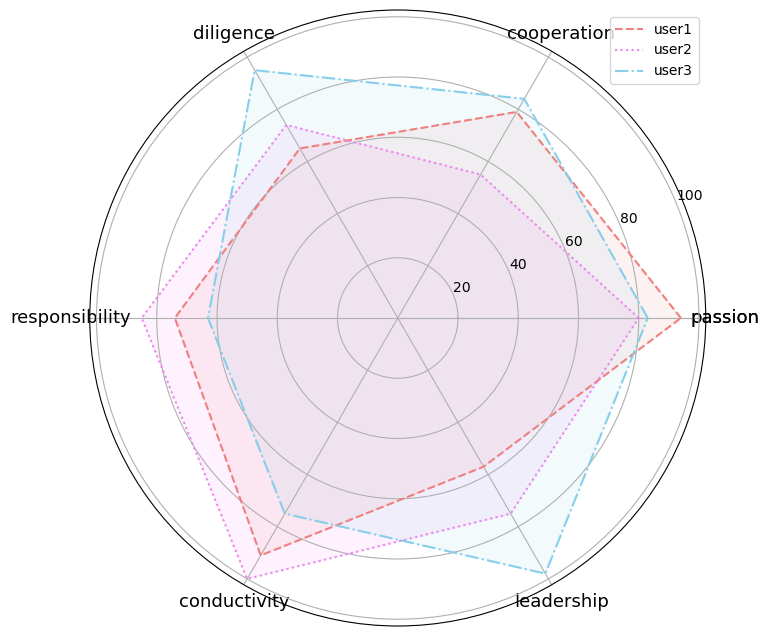

In [7]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['passion','cooperation','diligence','responsibility','conductivity','leadership']
categories = [*categories, categories[0]]

user1 = [94, 79, 65, 74, 91, 57]
user2 = [80, 55, 74, 85, 100, 75]
user3 = [83, 84, 95, 63, 75, 98]
user1 = [*user1, user1[0]]
user2 = [*user2, user2[0]]
user3 = [*user3, user3[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=len(user1))

plt.figure(figsize=(8, 8))
ax = plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories, fontsize=13)
ax.plot(label_loc, user1, label='user1', linestyle='dashed', color='lightcoral')
ax.fill(label_loc, user1, color='lightcoral', alpha=0.1)
ax.plot(label_loc, user2, label='user2', linestyle='dotted', color='violet')
ax.fill(label_loc, user2, color='violet', alpha=0.1)
ax.plot(label_loc, user3, label='user3', linestyle='dashdot', color='skyblue')
ax.fill(label_loc, user3, color='skyblue', alpha=0.1)
ax.legend(loc='upper right')
plt.show()

In [16]:
data

{'00001': {'voteCount': 4,
  'votePoint': 248,
  'answerCount': 4,
  'total_work_time': 400,
  'final_score': {'passion': 5200,
   'cooperation': 3200,
   'diligence': 2800,
   'responsibility': 5200,
   'conductivity': 2400,
   'leadership': 6000},
  'text_answser': {'passion': [],
   'cooperation': [],
   'diligence': [],
   'responsibility': [],
   'conductivity': [],
   'leadership': []}},
 '00002': {'voteCount': 0,
  'votePoint': 0,
  'answerCount': 0,
  'total_work_time': 0,
  'final_score': {'passion': 0,
   'cooperation': 0,
   'diligence': 0,
   'responsibility': 0,
   'conductivity': 0,
   'leadership': 0},
  'text_answser': {'passion': [],
   'cooperation': [],
   'diligence': [],
   'responsibility': [],
   'conductivity': [],
   'leadership': []}},
 '00003': {'voteCount': 0,
  'votePoint': 0,
  'answerCount': 0,
  'total_work_time': 0,
  'final_score': {'passion': 0,
   'cooperation': 0,
   'diligence': 0,
   'responsibility': 0,
   'conductivity': 0,
   'leadership': 0},


In [63]:
a = np.array([0.47953823, 0.21567327, 0.87450892, 0.8563058,  0.3632104,  0.4286551])

a_sort = np.argsort(a)
a_sort

array([1, 4, 5, 0, 3, 2], dtype=int64)

In [94]:
a_least = np.where(a > 0.85)
len(a_least[0])

2

In [132]:
a_least = np.where(a > 0.9)

# creating a new dictionary
output = []
personal_dict = {'근성' : 0, '열정' : 1, '협력' : 2, '책임' : 3, '창의성/생산성' : 4, '리더십' : 5}

# list out keys and values separately
key_list = list(personal_dict.keys())
val_list = list(personal_dict.values())

# print key with values
# if len(a_least[0]) == 0:
#     a_sort = np.argmax(a)
#     position = val_list.index(a_sort)
#     output.append(key_list[position])
    
for i in a_least[0]:
    position = val_list.index(i)
    output.append(key_list[position])


In [133]:
output

[]

In [138]:
pip install kss

     ---------------------------------------- 0.0/79.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/79.1 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/79.1 kB ? eta -:--:--
     -------------- ----------------------- 30.7/79.1 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/79.1 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 79.1/79.1 kB 488.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/131.3 kB ? eta -:--:--
     --------- ----------------------------- 30.7/131.3 kB 1.3 MB/s eta 0:00:01
     ----------------- ------------------- 61.4/131.3 kB 825.8 kB/s eta 0:00:01
     ------------------------- ----------- 92.2/131.3 kB 871.5 kB/s eta 0:00:01
     --------------------------------- -- 122.9/131.3 kB 722.1 kB/s eta 0:00:01
     ------------------------------------ 131.3/

In [3]:
from kss import split_sentences

test_txt = "매사에 열심히 임하며, 맡은바 최선을 다함.  팀 내에서 리더로서 역할을 수행할 수 있는 능력을 가지고 있으며, 조직원들에게 동기부여를 할 수 있음. 주어진 업무를 성실하게 수행하며, 정해진 기한내에 업무를 마무리 함. 본인이 맡은 업무에 대해 책임감을 가지고 끝까지 완수함"

print(split_sentences(test_txt))

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



['매사에 열심히 임하며, 맡은바 최선을 다함.', '팀 내에서 리더로서 역할을 수행할 수 있는 능력을 가지고 있으며, 조직원들에게 동기부여를 할 수 있음.', '주어진 업무를 성실하게 수행하며, 정해진 기한내에 업무를 마무리 함.', '본인이 맡은 업무에 대해 책임감을 가지고 끝까지 완수함']


In [144]:
!git clone https://github.com/ssut/py-hanspell.git
!cd py-hanspell
!python setup.py install

SyntaxError: invalid syntax (3153841224.py, line 1)

In [3]:
!pip install py-hanspell

In [1]:
from hanspell import spell_checker

In [2]:
text = "아버지가방에들어가신다나는오늘코딩을했다"

hanspell_sent = spell_checker.check(text)
print(hanspell_sent.checked)

KeyError: 'result'

In [135]:
output_dict = {'근성' : [], '열정' : [], '협력' : [], '책임' : [], '창의성/생산성' : [], '리더십' : []}
for k in output:
    output_dict[k].append(input_text)
output_dict

{'근성': [], '열정': [], '협력': [], '책임': [], '창의성/생산성': [], '리더십': []}

In [127]:
    # 근성 = 0
    # 열정 = 1
    # 협력 = 2
    # 책임 = 3
    # 창의성/생산성 = 4
    # 리더십 = 5